In [1]:
import os 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [13]:
DATA_DIR = "../data"

In [17]:
# Returns history of a field
# with shape
# (time_steps, field_size, num_of_particle_sizes)
def load_history(filename):
    path = os.path.join(DATA_DIR, filename)
    history = [[]]
    first_line = True
    idx = 0
    with open(path) as f:
        for line in f:
            if first_line:
                first_line = False
                field_size = int(line.strip())
                continue
            history[-1].append(
                list(map(float, line.strip().split()))
            )
            idx += 1
            if idx == field_size:
                idx = 0
                history.append([])
    history.pop()

    history = np.array(history)
    return history

In [18]:
history = load_history("history.txt")

In [19]:
history.shape

(4, 500, 100)

ValueError: too many values to unpack (expected 2)

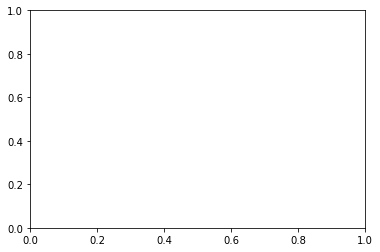

In [22]:
z = history
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

time = np.arange(z.shape[0])
x = np.arange(z.shape[1])

fig, ax = plt.subplots()

c = ax.pcolormesh(x, time, z, cmap='RdBu', vmin=z_min / 10, vmax=z_max / 10)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), time.min(), time.max()])
fig.colorbar(c, ax=ax)

plt.show()

## Animation

In [26]:
z.max()

0.716327

Done!


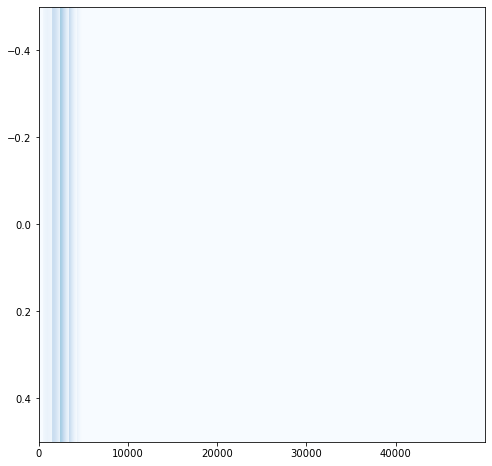

In [24]:
z = history
# z_min = history.min()
# z_max = history.max()
z_min = 0
z_max = 2

fps = 60

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

im = plt.imshow(z[0].reshape(1, -1), cmap='Blues', interpolation='none', aspect='auto', vmin=z_min, vmax=z_max)

def animate_func(i):
    im.set_array(z[i].reshape(1, -1))
    return [im]

anim = animation.FuncAnimation(
            fig, 
            animate_func, 
            frames = z.shape[0],
            interval = 1000 / fps, # in ms
)

# anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
print('Done!')

In [25]:
from IPython.display import HTML

HTML(anim.to_html5_video())